In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('C:\\Users\\rawat\\OneDrive\\Desktop\\DA\\Handson\\purchase_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


In [5]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [6]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
data['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     92588
2     48580
3     45569
4+    40665
0     35612
Name: count, dtype: int64

In [8]:
data['Stay_In_Current_City_Years'].replace(to_replace='4+', value=4, inplace=True)
#0r
#data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].replace(to_replace='4+', value=4)
#Notes- in above, there's difference of inplace

In [9]:
data['Stay_In_Current_City_Years']=pd.to_numeric(data['Stay_In_Current_City_Years'],errors='coerce')
#or use .astype('int')

In [10]:
#null values=nan values
#empty space in column is str value
#0 is value too
#only nan are null value

In [11]:
data.dropna(inplace=True)

In [85]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [91]:
# Encoding
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder
la = LabelEncoder()  # la=ABC()


#Encoding can be used for numerical data also but prefered for categorical data

In [94]:
data['Gender']=la.fit_transform(data['Gender'])
print('Gender', la.classes_)



Gender ['F' 'M']


In [95]:
data['Gender'].unique()

array([0, 1])

In [96]:
label_mapping=dict(zip(la.classes_,la.transform(la.classes_)))
label_mapping

{'F': 0, 'M': 1}

In [97]:
data['Age']=la.fit_transform(data['Age'])

In [98]:
print('Age', la.classes_)

Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']


In [99]:
data['Age'].unique()

array([0, 4, 2, 5, 3, 1, 6])

In [100]:
label_mapping=dict(zip(la.classes_,la.transform(la.classes_)))
label_mapping
#it shows which values converted to which.
#fit_transform only once when we intitially pass data after that only transform

{'0-17': 0,
 '18-25': 1,
 '26-35': 2,
 '36-45': 3,
 '46-50': 4,
 '51-55': 5,
 '55+': 6}

In [101]:
data['Product_ID']=la.fit_transform(data['Product_ID'])
data['User_ID']=la.fit_transform(data['User_ID'])
data['City_Category']=la.fit_transform(data['City_Category'])

In [104]:
data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,391,0,0,10.0,0,2.0,0.0,1.0,6.0,14.0,15200.0
6,3,284,1,4,7.0,1,2.0,1.0,1.0,8.0,17.0,19215.0
13,4,211,1,2,20.0,0,1.0,1.0,1.0,2.0,5.0,15665.0
14,5,363,0,5,9.0,0,1.0,0.0,5.0,8.0,14.0,5378.0
16,5,517,0,5,9.0,0,1.0,0.0,2.0,3.0,4.0,13055.0


C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


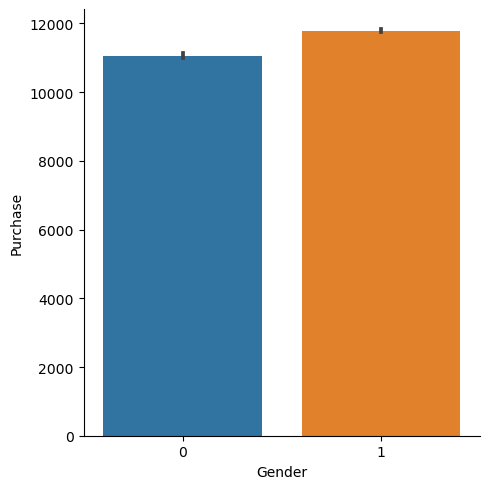

In [103]:
#which gender is dominating the purchase
#sns.barplot(x='Gender', y='Purchase', data=data)
sns.catplot(x='Gender', y='Purchase', data=data, kind='bar')

#Among all men and women, majority of puchase by man

<Axes: xlabel='Gender', ylabel='count'>

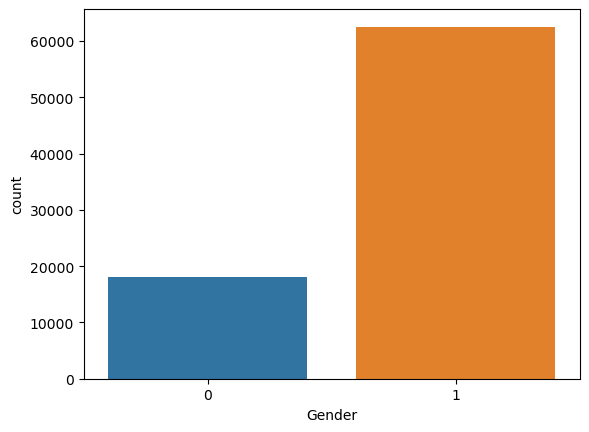

In [53]:
sns.countplot(x='Gender', data=data)

<Axes: xlabel='c', ylabel='b'>

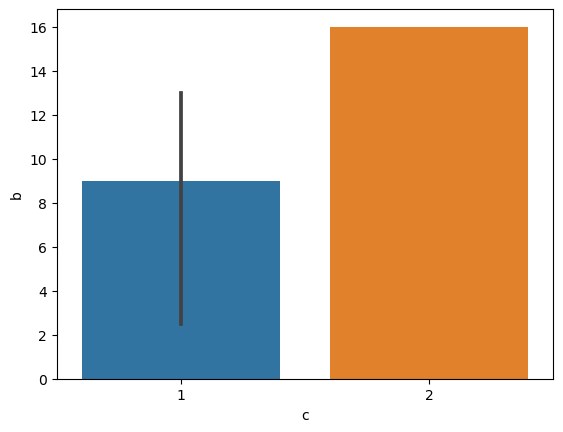

In [74]:
a={'c':[1,1,1,1,2],
   'b':[10,12,14,0,16]}
x=pd.DataFrame(a)
sns.barplot(x='c', y='b', data=x)
#this plot is an example to understand what barplot does.
#In bar plot, it takess unique values for x axis and then calculate avg of all y values corresponding to that x value

<Axes: xlabel='Product_Category_1', ylabel='count'>

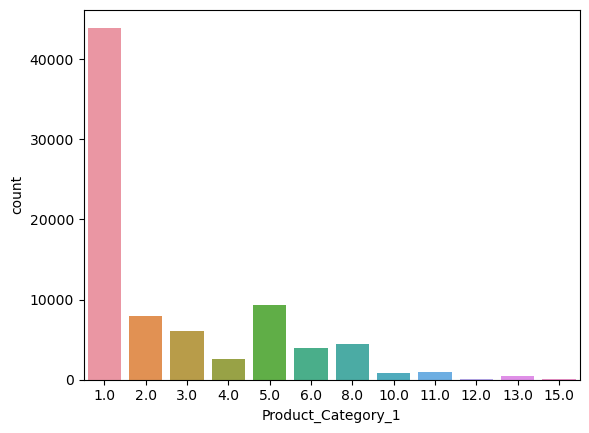

In [105]:
#for frequency, we go for either countplot or histogram
sns.countplot(x='Product_Category_1', data=data)


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

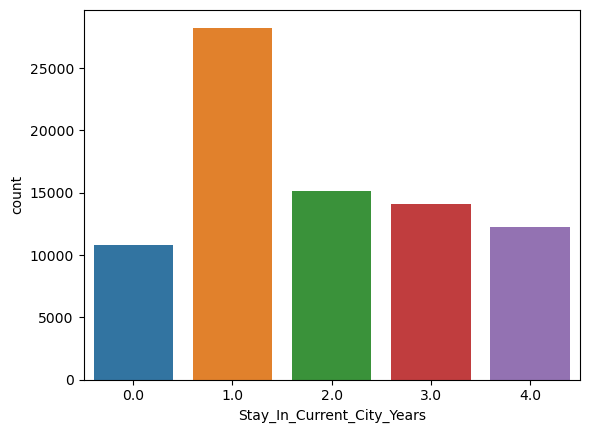

In [106]:
sns.countplot(x='Stay_In_Current_City_Years', data=data)

# Statistical Analysis

Using Statistical Analysis, find out statistical evidence for the following:

a. It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?

b. It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?

c. Are the variances of the purchase amounts significantly different between men and women in the age group 18-25?"

d. Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?

1. It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?
null hypothesis - The mean is 10000
alternate hypothesis - The mean is not 10000

In [18]:
sample1=data[(data['Age']=='18-25') & (data['Gender']=='M')].sample(25)

In [24]:
sample1['Purchase'].mean()
sample1['Purchase'].std()


5649.660771527202

In [23]:
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(sample1["Purchase"], 10000)
print(t_stat, p_value )

1.9300273841136228 0.06550413135327829


p_value>0.05, therefore, Ho is true.

#2. It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?
#null hypothesis - The proportion is 35%
#alternate hypothesis - not 35%

In [36]:
sample2=data[data['Purchase']>10000].sample(50)
sample2[(sample2['Purchase']>10000) & (sample2['Gender']=='F')]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
226268,1004865,P00114342,F,36-45,14.0,C,1.0,1.0,1.0,8.0,17.0,15612.0
223140,1004380,P00188742,F,26-35,1.0,C,1.0,0.0,8.0,14.0,17.0,10056.0
88613,1001658,P00112542,F,36-45,6.0,B,2.0,0.0,1.0,11.0,15.0,19000.0
24472,1003781,P00015942,F,55+,11.0,C,4.0,0.0,6.0,10.0,13.0,16398.0
201223,1001092,P00004842,F,18-25,4.0,C,2.0,0.0,3.0,4.0,12.0,10678.0
258169,1003782,P00190142,F,26-35,0.0,B,3.0,0.0,3.0,4.0,5.0,10588.0
237698,1000695,P00253142,F,18-25,1.0,A,2.0,0.0,1.0,2.0,5.0,11423.0
82468,1000746,P00112142,F,18-25,19.0,B,3.0,0.0,1.0,2.0,14.0,11466.0
82960,1000831,P00119142,F,46-50,0.0,C,2.0,1.0,3.0,4.0,12.0,11051.0
91928,1002106,P00058242,F,18-25,20.0,A,3.0,1.0,3.0,4.0,12.0,10822.0


In [63]:
sample2['Gender'].value_counts()

Gender
M    39
F    11
Name: count, dtype: int64

In [64]:
count=sample2['Gender'].value_counts()['F']
nobs=len(sample2)

In [65]:
from statsmodels.stats.proportion import proportions_ztest

z_stat, p_val = proportions_ztest(count=count,
                                  nobs=nobs,
                                  value=0.05)
print(z_stat, p_val)

2.901852153495405 0.0037096357179838575


p_value<0.05, therefore, Ho is false.

3.  Are the variances of the purchase amounts significantly different between men and women in the age group 18-25?
H0- variance same
h1- variance diff

In [66]:
sample3F= data[(data['Age']=='18-25') & (data['Gender']=='F')].sample(50)
sample3M=data[(data['Age']=='18-25') & (data['Gender']=='M')].sample(50)

In [67]:
F=sample3M['Purchase'].var()/sample3F['Purchase'].var()
df1=len(sample3M)
df2=len(sample3F)

In [68]:
import scipy
scipy.stats.f.cdf(F, df1, df2)

0.2981700456080611

#the p-value is greater than 0.05, do not reject the null hypothesis.

4. Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?
H0- same
H1- differ

In [69]:
sample4a=data[(data['Age']=='18-25') & (data['Purchase']>10000)].sample(50)
sample4b=data[(data['Age']=='26-35') & (data['Purchase']>10000)].sample(50)

In [70]:
sample4a['Gender'].value_counts()

Gender
M    41
F     9
Name: count, dtype: int64

In [71]:
sample4b['Gender'].value_counts()

Gender
M    40
F    10
Name: count, dtype: int64

In [72]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([41, 38])
nobs = np.array([50, 50])
stat, pval = proportions_ztest(count, 
                               nobs,
                              value=0.05,
                              alternative='two-sided')

print(stat, pval)

0.12275715403505834 0.9022994036926009


p_value>0.05, therefore, Ho is true.

In [1]:
1/17


0.058823529411764705